In [1]:
#importing needed libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#importing data files from the current directory using pandas

project_data= pd.read_csv('train_data.csv')
resource_data=pd.read_csv('resources.csv')

In [3]:
#printing the shape of both project_data and resource_data

print('Number of data point in project_data: ',project_data.shape[0])
print('Number of features/columns in project_data: ',project_data.shape[1],'\n')

print('Number of data point in resource_data: ',resource_data.shape[0])
print('Number of features/columns in resource_data: ',resource_data.shape[1],'\n')

Number of data point in project_data:  109248
Number of features/columns in project_data:  17 

Number of data point in resource_data:  1541272
Number of features/columns in resource_data:  4 



In [4]:
#information about all the columns/features present in project_data
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   Unnamed: 0                                    109248 non-null  int64 
 1   id                                            109248 non-null  object
 2   teacher_id                                    109248 non-null  object
 3   teacher_prefix                                109245 non-null  object
 4   school_state                                  109248 non-null  object
 5   project_submitted_datetime                    109248 non-null  object
 6   project_grade_category                        109248 non-null  object
 7   project_subject_categories                    109248 non-null  object
 8   project_subject_subcategories                 109248 non-null  object
 9   project_title                                 109248 non-nu

In [5]:
#information about all the columns/features present in resource_data
resource_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541272 entries, 0 to 1541271
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1541272 non-null  object 
 1   description  1540980 non-null  object 
 2   quantity     1541272 non-null  int64  
 3   price        1541272 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ MB


In [6]:
def univariate_barplots(data, col1, col2='project_is_approved',top=False):
    
    df = data.groupby(col1).agg(count=(col1, 'count')).reset_index().sort_values('count',ascending=False)
    approved = data[data[col2]==1].groupby(col1).agg(approved=(col2,'count')).reset_index()
    df = pd.merge(df,approved ,on=col1,how='inner')
    df['avg'] = df['approved']/df['count']
    
    if top:
        df=df.iloc[:top]
    
    pos = np.arange(len(df))
    plt.figure(figsize=(20,5))
    p1 = plt.bar(pos, df['count'].values)
    p2 = plt.bar(pos, df['approved'].values)

    plt.ylabel('Projects')
    plt.title('% of projects aproved state wise')
    plt.xticks(pos, list(df[col1].values))
    plt.legend((p1[0], p2[0]), ('not accepted', 'accepted'))
    plt.show()
    
    

    print(df.head(5))
    print("="*50)
    print(df.tail(5))
    

### 1.2.2 Univariate Analysis: school_state

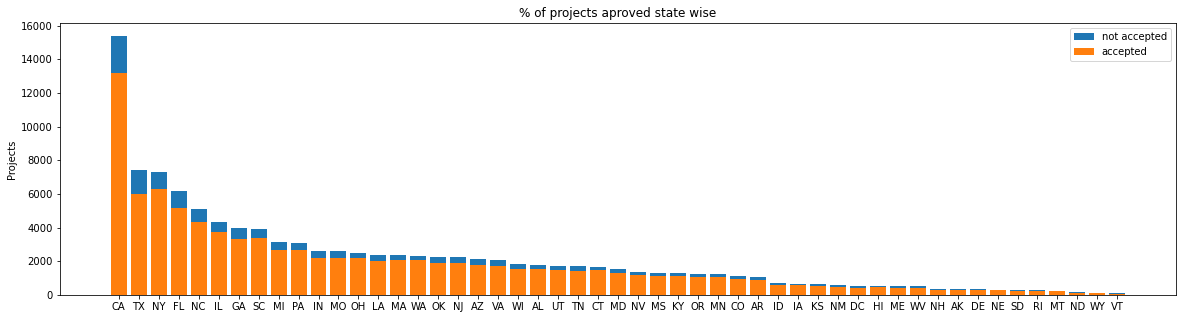

  school_state  count  approved       avg
0           CA  15388     13205  0.858136
1           TX   7396      6014  0.813142
2           NY   7318      6291  0.859661
3           FL   6185      5144  0.831690
4           NC   5091      4353  0.855038
   school_state  count  approved       avg
46           RI    285       243  0.852632
47           MT    245       200  0.816327
48           ND    143       127  0.888112
49           WY     98        82  0.836735
50           VT     80        64  0.800000


In [7]:
univariate_barplots(project_data, 'school_state', 'project_is_approved')

__Every state is having more than 80% success rate in approval__

### 1.2.2 Univariate Analysis: teacher_prefix

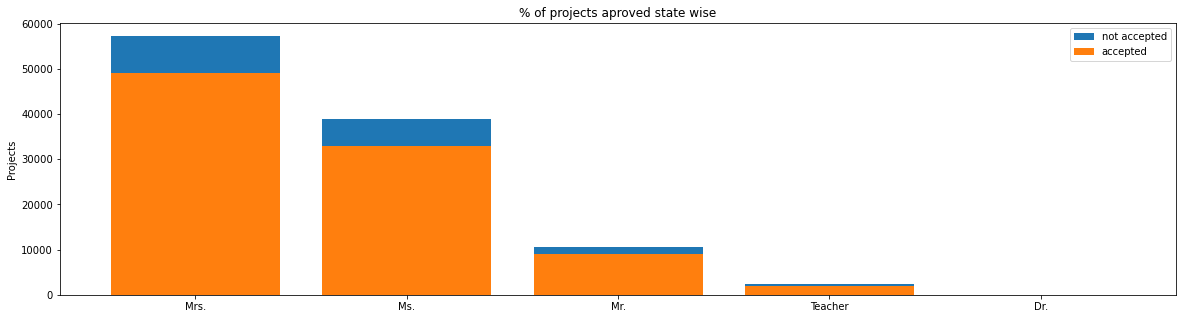

  teacher_prefix  count  approved       avg
0           Mrs.  57269     48997  0.855559
1            Ms.  38955     32860  0.843537
2            Mr.  10648      8960  0.841473
3        Teacher   2360      1877  0.795339
4            Dr.     13         9  0.692308
  teacher_prefix  count  approved       avg
0           Mrs.  57269     48997  0.855559
1            Ms.  38955     32860  0.843537
2            Mr.  10648      8960  0.841473
3        Teacher   2360      1877  0.795339
4            Dr.     13         9  0.692308


In [8]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved')

**Observation**
1. Dr. is a teacher_prefix on which very least number of project submissions made

### 1.2.3 Univariate Analysis: project_grade_category

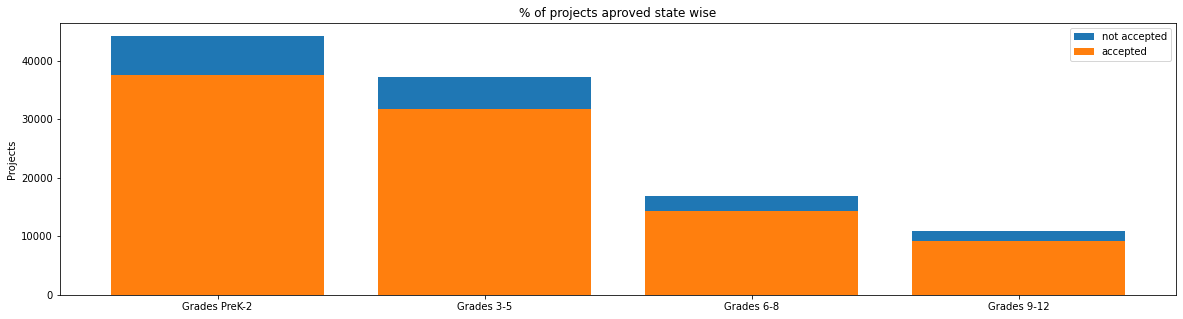

  project_grade_category  count  approved       avg
0          Grades PreK-2  44225     37536  0.848751
1             Grades 3-5  37137     31729  0.854377
2             Grades 6-8  16923     14258  0.842522
3            Grades 9-12  10963      9183  0.837636
  project_grade_category  count  approved       avg
0          Grades PreK-2  44225     37536  0.848751
1             Grades 3-5  37137     31729  0.854377
2             Grades 6-8  16923     14258  0.842522
3            Grades 9-12  10963      9183  0.837636


In [9]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved')

### 1.2.4 Univariate Analysis: project_subject_categories

In [10]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [11]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


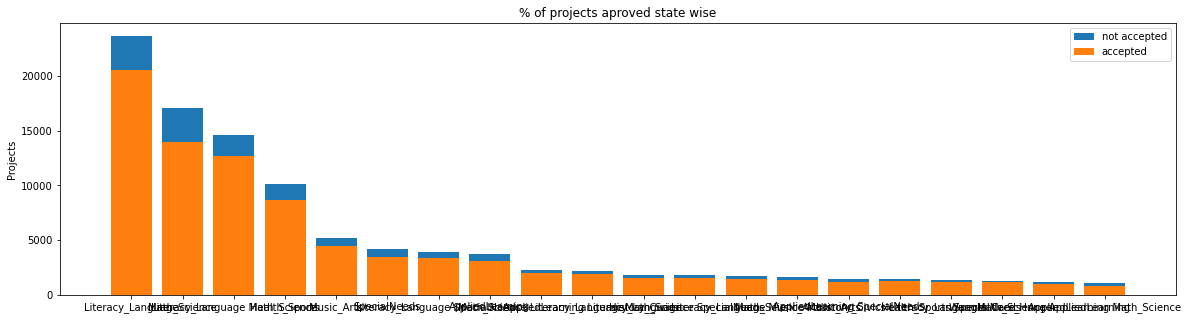

                 clean_categories  count  approved       avg
0               Literacy_Language  23655     20520  0.867470
1                    Math_Science  17072     13991  0.819529
2  Literacy_Language Math_Science  14636     12725  0.869432
3                   Health_Sports  10177      8640  0.848973
4                      Music_Arts   5180      4429  0.855019
                    clean_categories  count  approved       avg
15  History_Civics Literacy_Language   1421      1271  0.894441
16        Health_Sports SpecialNeeds   1391      1215  0.873472
17                Warmth Care_Hunger   1309      1212  0.925898
18      Math_Science AppliedLearning   1220      1019  0.835246
19      AppliedLearning Math_Science   1052       855  0.812738


In [12]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved',top=20)

In [13]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())
    
my_counter

Counter({'Literacy_Language': 52239,
         'History_Civics': 5914,
         'Health_Sports': 14223,
         'Math_Science': 41421,
         'SpecialNeeds': 13642,
         'AppliedLearning': 12135,
         'Music_Arts': 10293,
         'Warmth': 1388,
         'Care_Hunger': 1388})

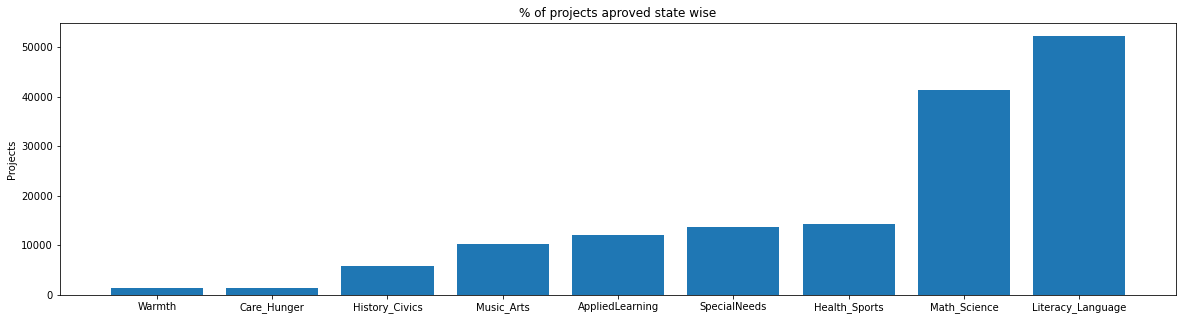

In [14]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [15]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [16]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [17]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


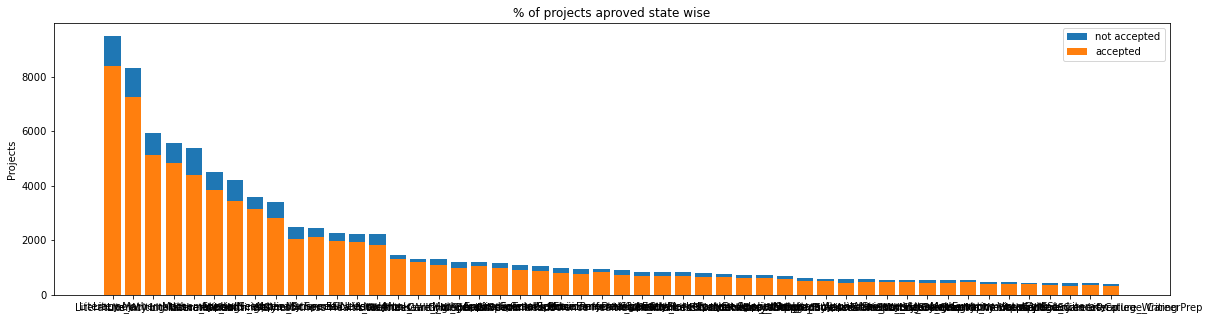

              clean_subcategories  count  approved       avg
0                        Literacy   9486      8371  0.882458
1            Literacy Mathematics   8325      7260  0.872072
2  Literature_Writing Mathematics   5923      5140  0.867803
3     Literacy Literature_Writing   5571      4823  0.865733
4                     Mathematics   5379      4385  0.815207
                   clean_subcategories  count  approved       avg
45       EnvironmentalScience Literacy    444       389  0.876126
46                                 ESL    421       349  0.828979
47                  College_CareerPrep    421       343  0.814727
48  AppliedSciences Literature_Writing    420       361  0.859524
49  AppliedSciences College_CareerPrep    405       330  0.814815


In [18]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [19]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

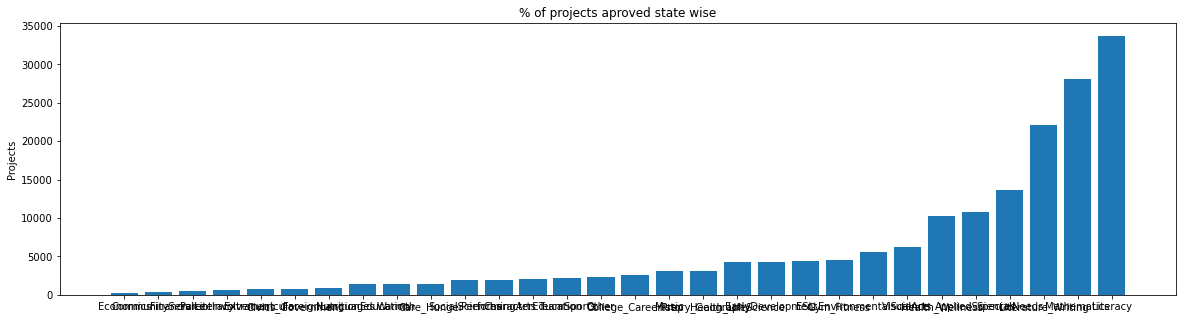

In [20]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [21]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### 1.2.7 Univariate Analysis: Text features (Project Essay's)

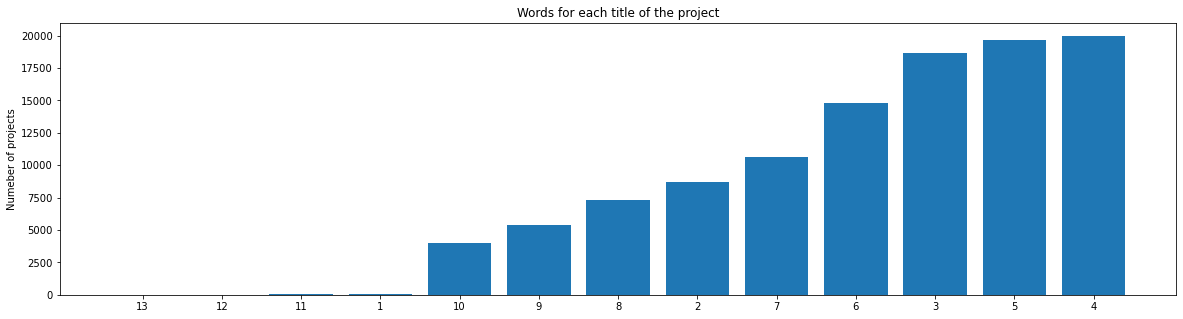

In [22]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [23]:
approved_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

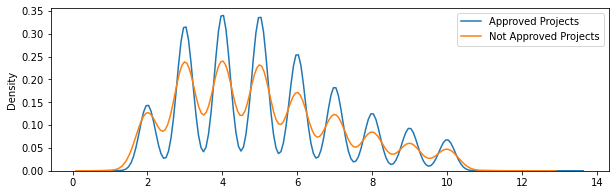

In [24]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

### 1.2.8 Univariate Analysis: Cost per project

In [25]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [26]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [27]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [28]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

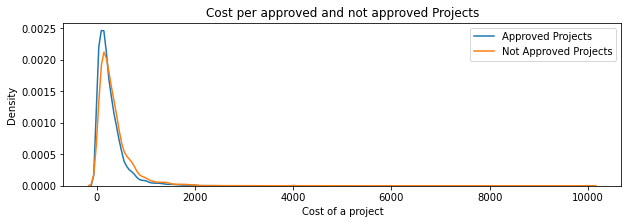

In [29]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [30]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

<h3><font color='black'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

In [31]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109248 entries, 0 to 109247
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Unnamed: 0                                    109248 non-null  int64  
 1   id                                            109248 non-null  object 
 2   teacher_id                                    109248 non-null  object 
 3   teacher_prefix                                109245 non-null  object 
 4   school_state                                  109248 non-null  object 
 5   project_submitted_datetime                    109248 non-null  object 
 6   project_grade_category                        109248 non-null  object 
 7   project_title                                 109248 non-null  object 
 8   project_essay_1                               109248 non-null  object 
 9   project_essay_2                               10

In [32]:
approved_price = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values

rejected_price = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values
approved_price

array([7, 4, 1, ..., 3, 0, 0], dtype=int64)

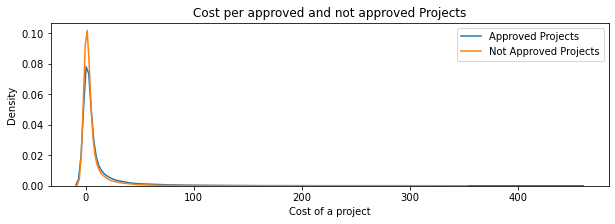

In [33]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [34]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.0        |          0.0          |
|     5      |        0.0        |          0.0          |
|     10     |        0.0        |          0.0          |
|     15     |        0.0        |          0.0          |
|     20     |        0.0        |          0.0          |
|     25     |        0.0        |          0.0          |
|     30     |        1.0        |          0.0          |
|     35     |        1.0        |          1.0          |
|     40     |        1.0        |          1.0          |
|     45     |        2.0        |          1.0          |
|     50     |        2.0        |          2.0          |
|     55     |        3.0        |          2.0          |
|     60     |        4.0        |          3.0          |
|     65     |        5.0        |          3.0         

<h3><font color='black'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

In [35]:
project_data.project_resource_summary

0         My students need opportunities to practice beg...
1         My students need a projector to help with view...
2         My students need shine guards, athletic socks,...
3         My students need to engage in Reading and Math...
4         My students need hands on practice in mathemat...
                                ...                        
109243    My students need these privacy partitions to h...
109244    My students need two iPad's and protective cas...
109245    My students need giant comfy pillows in order ...
109246    My students need flexible seating options: bea...
109247    My students need opportunities to work with te...
Name: project_resource_summary, Length: 109248, dtype: object

In [36]:
#https://www.geeksforgeeks.org/python-check-if-string-contains-any-number/

project_data['digit_in_summary']=[ 1 if bool(re.search(r'\d',i)) else 0 for i in project_data.project_resource_summary]

In [37]:
project_data[['project_resource_summary','digit_in_summary']][project_data['digit_in_summary']==1]

,project_resource_summary,digit_in_summary
12,My students need 3D and 4D life science activi...,1
14,My students need 5 tablets for our classroom t...,1
16,My students need 2 LeapPad that will engage th...,1
19,My students need 7 Hokki stools to encourage a...,1
25,My students need the learning centers and mult...,1
...,...,...
109182,My students need music stands for their guitar...,1
109193,My students need access to technology in order...,1
109211,My students need the basketball backboard to e...,1
109232,My students need a set of 5 opinion picture bo...,1


In [38]:
approved_price = project_data[project_data['project_is_approved']==1]['digit_in_summary'].values

rejected_price = project_data[project_data['project_is_approved']==0]['digit_in_summary'].values
approved_price

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Text(0.5, 0, 'digit_in_summary')

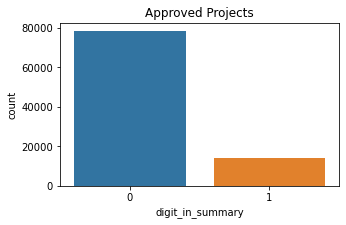

In [39]:
plt.figure(figsize=(5,3))
plt.title("Approved Projects")
sns.countplot(approved_price)
plt.xlabel('digit_in_summary')

Text(0.5, 0, 'digit_in_summary')

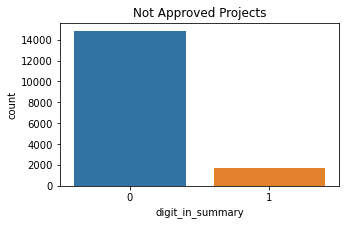

In [40]:
plt.figure(figsize=(5,3))
plt.title("Not Approved Projects")
sns.countplot(rejected_price)
plt.xlabel('digit_in_summary')

In [41]:
#Feature digit_in_summary is not very important for the analysis so we can drop this feature
project_data.drop(['digit_in_summary'],axis=1,inplace=True)